In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def imshowfunc(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

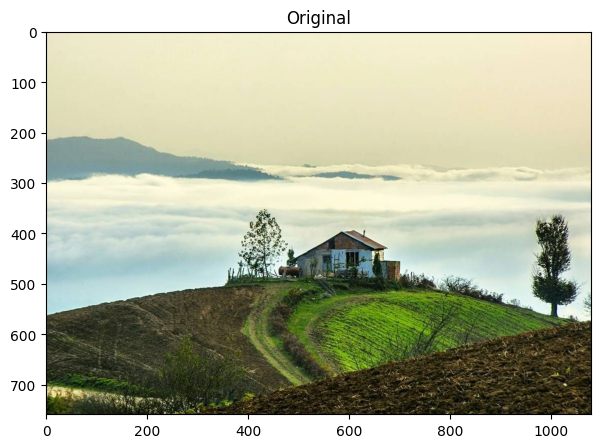

In [4]:
image = cv2.imread('mazandaran.jpg')
imshowfunc("Original", image)

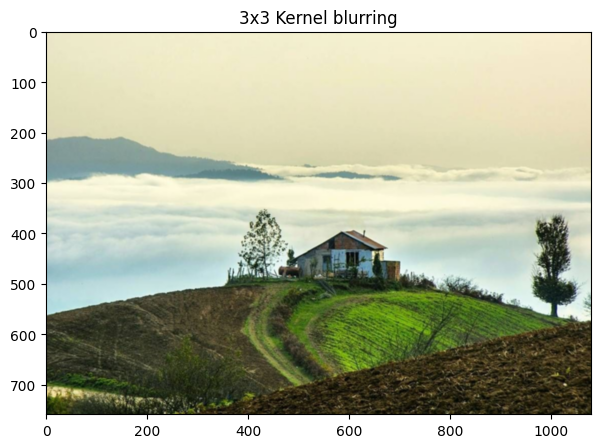

In [ ]:
kernel_3x3 = np.ones((3,3) , np.float32) / 9

blurred = cv2.filter2D(image, -1,kernel_3x3)

#-1 = خروجی هم‌نوع ورودی
#منظور از 3در3 این است که یک پیکسل با 8 پیکسل اطرافش تقسیم بر 9 می شود

imshowfunc('3x3 Kernel blurring' , blurred)

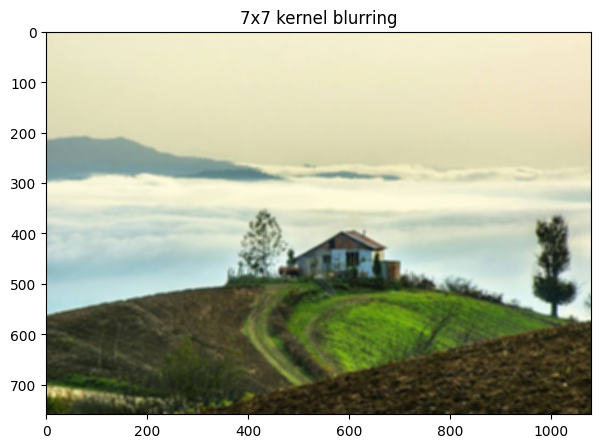

In [5]:
kernel_7x7 = np.ones((7,7) , np.float32) / 49
blurred2 = cv2.filter2D(image , -1 , kernel_7x7)

imshowfunc('7x7 kernel blurring' , blurred2)

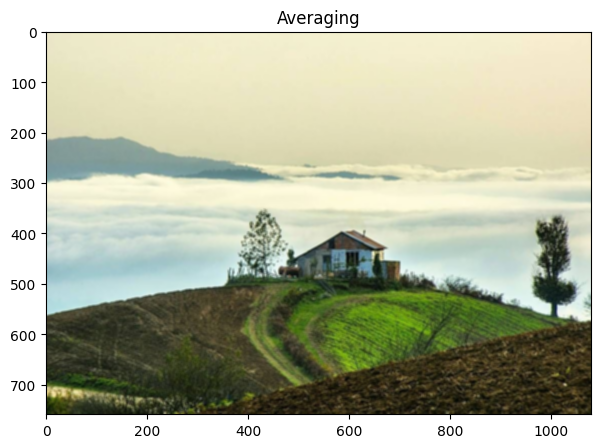

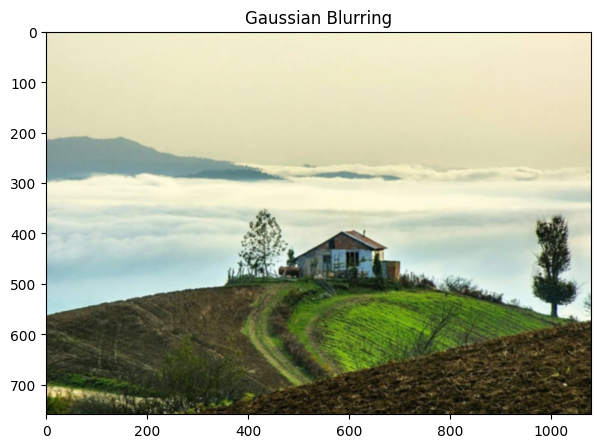

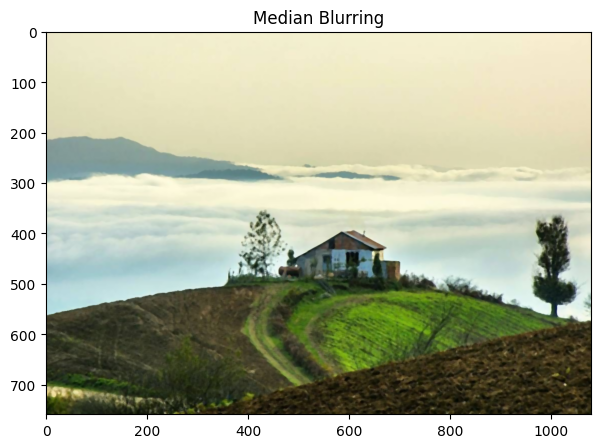

In [6]:
blur = cv2.blur(image, (5,5))
imshowfunc('Averaging', blur)

Gaussian = cv2.GaussianBlur(image, (5,5), 0)
imshowfunc('Gaussian Blurring', Gaussian)


median = cv2.medianBlur(image, 5)
imshowfunc('Median Blurring', median)

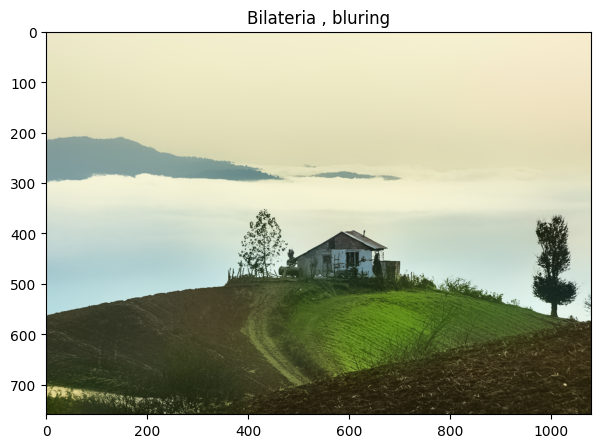

In [7]:
bilateria = cv2.bilateralFilter(image,100,75,75)

imshowfunc('Bilateria , bluring' , bilateria)

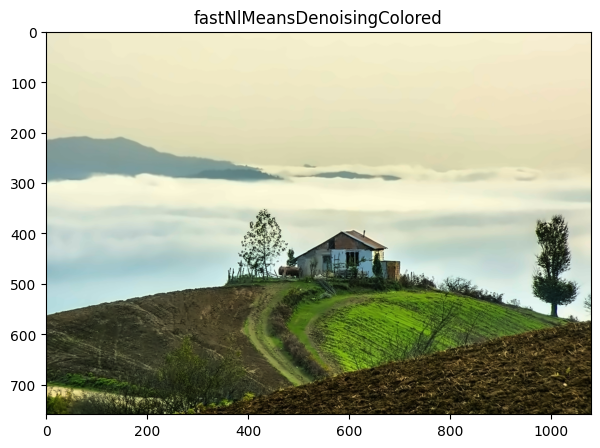

In [10]:
dst = cv2.fastNlMeansDenoisingColored(image, None,6,6,7,21)
imshowfunc('fastNlMeansDenoisingColored' , dst)

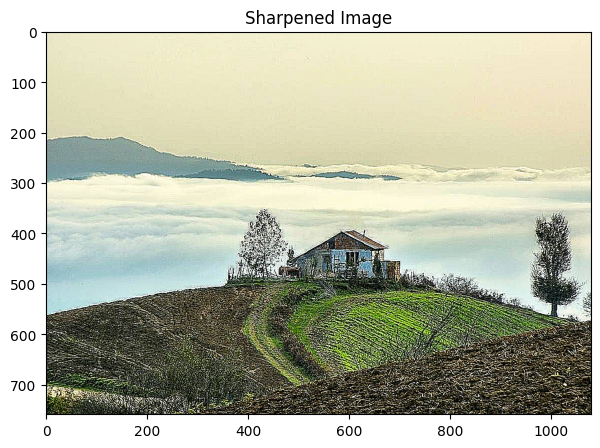

In [24]:
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])

sharpened = cv2.filter2D(image,-1,kernel_sharpening)
imshowfunc('Sharpened Image' , sharpened)
#وسط 9 → پیکسل اصلی وزن زیادی داره

#اطراف -1 → پیکسل‌های همسایه ازش کم می‌کنن

#نتیجه: تفاوت پیکسل اصلی با همسایه‌ها بزرگ‌تر می‌شه → لبه‌ها برجسته می‌شن

#این کار دقیقاً همون کاریه که چشم ما می‌بینه به عنوان «شارپ شدن».